<a href="https://colab.research.google.com/github/vicentesantos/LAB01_Seguro-Desemprego/blob/main/pos_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurando a importação de dados

In [ ]:
from google.colab import files
uploaded = files.upload()  # faça upload do JSON aqui


In [ ]:
#https://ftp.ibge.gov.br/Trabalho_e_Rendimento/Pesquisa_Nacional_por_Amostra_de_Domicilios_PNAD_COVID19/Microdados/Dados/

In [ ]:
import pandas as pd

# carregar cada mês
df_set = pd.read_csv("PNAD_COVID_092020.csv", sep=",", encoding="latin1")
df_out = pd.read_csv("PNAD_COVID_102020.csv", sep=",", encoding="latin1")
df_nov = pd.read_csv("PNAD_COVID_112020.csv", sep=",", encoding="latin1")

# adicionar coluna de referência de mês
df_set["ref_ym"] = "2020-09"
df_out["ref_ym"] = "2020-10"
df_nov["ref_ym"] = "2020-11"

# unir em um único dataframe
df_all = pd.concat([df_set, df_out, df_nov], ignore_index=True)

print(df_all.shape)
df_all.head()


In [ ]:
import os

# monta o Google Drive (se ainda não fez)
from google.colab import drive
drive.mount('/content/drive')

# cria a pasta caso não exista
os.makedirs("/content/drive/MyDrive/PNAD_COVID", exist_ok=True)

# agora salva o dataset consolidado
df_all.to_parquet("/content/drive/MyDrive/PNAD_COVID/pnad_covid_3meses.parquet", index=False)

print("✅ Arquivo salvo no Drive!")


# Importando os Dados

In [144]:
#inicio importação dos dados

In [145]:
import gdown
import pandas as pd

# ID do arquivo que está dentro da pasta compartilhada
file_id = "1UCA2g0qj-cpkS586xkx7ycyyEvkctkbQ"
url = f"https://drive.google.com/uc?id={file_id}"

output = "pnad_covid_3meses.parquet"

# Baixar
gdown.download(url, output, quiet=False)

# Ler parquet
df = pd.read_parquet(output)
print(df.shape)
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=1UCA2g0qj-cpkS586xkx7ycyyEvkctkbQ
To: /content/pnad_covid_3meses.parquet
100%|██████████| 31.3M/31.3M [00:00<00:00, 183MB/s]


(1149197, 149)
    Ano  UF  CAPITAL  RM_RIDE  V1008  V1012  V1013  V1016  Estrato        UPA  \
0  2020  11     11.0      NaN      1      4      9      5  1110011  110015970   
1  2020  11     11.0      NaN      1      4      9      5  1110011  110015970   
2  2020  11     11.0      NaN      1      4      9      5  1110011  110015970   
3  2020  11     11.0      NaN      1      4      9      5  1110011  110015970   
4  2020  11     11.0      NaN      2      1      9      5  1110011  110015970   

   ...  F002A2  F002A3  F002A4  F002A5  F0061  F006   ref_ym  A006A  A006B  \
0  ...       1       1       2       1      1   1.0  2020-09    NaN    NaN   
1  ...       1       1       2       1      1   1.0  2020-09    NaN    NaN   
2  ...       1       1       2       1      1   1.0  2020-09    NaN    NaN   
3  ...       1       1       2       1      1   1.0  2020-09    NaN    NaN   
4  ...       1       1       2       1      1   1.0  2020-09    NaN    NaN   

   A007A  
0    NaN  
1    Na

In [146]:
df.head()

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,...,F002A2,F002A3,F002A4,F002A5,F0061,F006,ref_ym,A006A,A006B,A007A
0,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN
1,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN
2,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN
3,2020,11,11.0,NaN,1,4,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN
4,2020,11,11.0,NaN,2,1,9,5,1110011,110015970,...,1,1,2,1,1,1.0,2020-09,NaN,NaN,NaN


In [147]:
print(df['RM_RIDE'].unique())

[nan 13. 15. 16. 21. 22. 23. 24. 25. 26. 27. 28. 29. 31. 32. 33. 35. 41.
 42. 43. 51. 52.]


In [148]:
# Lista simples das colunas
print(df.columns.tolist())

# Lista mais organizada (uma por linha)
for col in df.columns:
    print(col)


['Ano', 'UF', 'CAPITAL', 'RM_RIDE', 'V1008', 'V1012', 'V1013', 'V1016', 'Estrato', 'UPA', 'V1022', 'V1023', 'V1030', 'V1031', 'V1032', 'posest', 'A001', 'A001A', 'A001B1', 'A001B2', 'A001B3', 'A002', 'A003', 'A004', 'A005', 'A006', 'A007', 'A008', 'A009', 'B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019', 'B00110', 'B00111', 'B00112', 'B00113', 'B002', 'B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036', 'B0037', 'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046', 'B005', 'B006', 'B007', 'B008', 'B009A', 'B009B', 'B009C', 'B009D', 'B009E', 'B009F', 'B0101', 'B0102', 'B0103', 'B0104', 'B0105', 'B0106', 'B011', 'C001', 'C002', 'C003', 'C004', 'C005', 'C0051', 'C0052', 'C0053', 'C006', 'C007', 'C007A', 'C007B', 'C007C', 'C007D', 'C007E', 'C007E1', 'C007E2', 'C007F', 'C008', 'C009', 'C009A', 'C010', 'C0101', 'C01011', 'C01012', 'C0102', 'C01021', 'C01022', 'C0103', 'C0104', 'C011A', 'C011A1', 'C011A11', 'C011A12', 'C011A2', 'C011A21', 'C011A22', 'C012', 'C0

In [149]:
# df2 = df.rename(columns={
#     "V2007": "sexo",

#     "V3001": "escolaridade",
#     "C013": "febre",
#     "C014": "tosse",
#     "C015": "dificuldade_respirar",
#     "C016": "dor_cabeca",
#     "C017": "perda_olfato_paladar",
#     "C018": "fadiga",
#     "C019": "dor_muscular",
#     "C020": "dor_peito"
#     # ... seguir com as demais
# })

# Análise Clínica Epidemiologia

In [150]:
#Parte 2

In [151]:
df2 = df.rename(columns={
    "A003": "sexo",
    "V1012": "semana",
    "V1013": "mes",
    "RM_RIDE": "regiao",
    "V1008": "numero_domicilio",
    "V1016": "numero_entrevista",
    "B0011": "febre",
    "B0012": "tosse",
    "B0013": "dor_garganta",
    "B0014": "dificuldade_respirar",
    "B0016": "dor_cabeca",
    "B0018": "perda_olfato_paladar",
    "B0019": "dor_peito",
    "B002" : "atendimento",
    # B002 = Por causa disso foi a algum estabelecimento de saúde?
    "B008" : "realizacao_teste_covid",
    "B011": "resultado_teste_covid",
})

In [152]:
df_clinico = df2[["sexo","semana","mes","regiao","numero_domicilio","numero_entrevista","febre","tosse","dor_garganta","dificuldade_respirar","dor_cabeca","perda_olfato_paladar","dor_peito","atendimento","realizacao_teste_covid","resultado_teste_covid",]]

In [153]:
df_clinico

,sexo,semana,mes,regiao,numero_domicilio,numero_entrevista,febre,tosse,dor_garganta,dificuldade_respirar,dor_cabeca,perda_olfato_paladar,dor_peito,atendimento,realizacao_teste_covid,resultado_teste_covid
0,1,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,2
1,2,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,2
2,1,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,4
3,1,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,4
4,2,1,9,NaN,2,5,2,2,2,2,2,2,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149192,2,3,11,NaN,6,7,2,2,2,2,2,2,2,NaN,2,2
1149193,2,3,11,NaN,6,7,2,2,2,2,2,2,2,NaN,2,2
1149194,2,3,11,NaN,6,7,2,2,2,2,2,2,2,NaN,2,2
1149195,1,2,11,NaN,10,7,2,2,2,2,2,2,2,NaN,2,4


In [154]:
df_clinico['atendimento'].value_counts()

,count
atendimento,
2.0,33141
1.0,11796
9.0,13


## Metodologia da pesquisa
Cerca de dois mil agentes do IBGE telefonarão para 193,6 mil domicílios distribuídos em 3.364 municípios de todos os estados do país.
Para definir a amostra da nova pesquisa, o IBGE utilizou a base de 211 mil domicílios que participaram da PNAD Contínua no primeiro trimestre de 2019 e selecionou aqueles com número de telefone cadastrado.
A pesquisa vai estimar a quantidade de pessoas que tiveram algum dos sintomas de Covid-19, como febre, tosse, dificuldade de respirar, falta de paladar e olfato, fadiga, náusea e coriza.
Também será estimada a parcela da população que procurou atendimento e em quais tipos de estabelecimentos de saúde. Para os que não buscaram atendimento, será investigado as medidas que adotaram para tratar os sintomas.
Nos casos de internação, será possível saber também se o paciente foi sedado, entubado ou colocado em respiração artificial com ventilador. Já nas situações em que não houve deslocamento até uma unidade de saúde, será perguntado se os moradores receberam, por exemplo, a visita de um profissional de saúde na residência ou se tomaram algum remédio com ou sem orientação médica.
A PNAD Covid também vai acompanhar as mudanças no mercado de trabalho neste período de pandemia, abordando questões sobre a prática de home office, os motivos que impediram a busca por emprego e os rendimentos obtidos pelas famílias.

In [155]:
df_clinico[(df_clinico["numero_domicilio"] == 1) & (df_clinico["numero_entrevista"] == 5) & (df_clinico["semana"] == 4) & (df_clinico["mes"] == 9)]

,sexo,semana,mes,regiao,numero_domicilio,numero_entrevista,febre,tosse,dor_garganta,dificuldade_respirar,dor_cabeca,perda_olfato_paladar,dor_peito,atendimento,realizacao_teste_covid,resultado_teste_covid
0,1,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,2
1,2,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,2
2,1,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,4
3,1,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,4
686,2,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386642,2,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,3
387222,1,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,1
387223,2,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,1
387224,2,4,9,NaN,1,5,2,2,2,2,2,2,2,NaN,2,3


In [156]:
print(df_clinico['numero_domicilio'].unique())

[ 1  2  3  4  5  6  7  9 10 11 13 12 14  8]


In [157]:
grouped_unique_domicilios = df_clinico.groupby('regiao')['numero_domicilio'].unique()
print(grouped_unique_domicilios)

regiao
13.0    [3, 5, 6, 7, 9, 10, 12, 13, 1, 4, 11, 2, 8, 14]
15.0    [1, 5, 8, 9, 10, 11, 12, 14, 7, 13, 3, 2, 4, 6]
16.0    [4, 7, 8, 10, 11, 12, 14, 1, 2, 3, 5, 9, 13, 6]
21.0    [3, 8, 13, 14, 5, 11, 1, 2, 7, 9, 6, 12, 4, 10]
22.0    [1, 2, 3, 5, 6, 7, 8, 9, 10, 13, 14, 12, 11, 4]
23.0    [2, 4, 6, 7, 9, 12, 13, 14, 1, 3, 11, 5, 8, 10]
24.0    [1, 2, 3, 6, 8, 10, 11, 12, 4, 5, 9, 13, 14, 7]
25.0    [1, 2, 3, 5, 8, 9, 10, 12, 13, 4, 7, 11, 14, 6]
26.0    [5, 7, 8, 10, 12, 14, 1, 2, 6, 3, 4, 9, 11, 13]
27.0    [3, 6, 9, 5, 8, 14, 4, 10, 1, 7, 13, 11, 12, 2]
28.0    [4, 6, 7, 8, 9, 12, 13, 1, 3, 5, 10, 11, 14, 2]
29.0    [1, 3, 6, 7, 10, 11, 14, 5, 2, 4, 8, 9, 13, 12]
31.0    [1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 4, 7]
32.0    [1, 6, 7, 8, 9, 11, 12, 13, 14, 3, 4, 5, 10, 2]
33.0    [4, 8, 9, 13, 1, 2, 5, 6, 10, 11, 14, 12, 7, 3]
35.0    [3, 6, 7, 8, 1, 2, 4, 5, 10, 12, 13, 9, 11, 14]
41.0    [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 8, 12, 13]
42.0    [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 

In [158]:
df_clinico.groupby('regiao')['numero_domicilio'].nunique()


,numero_domicilio
regiao,
13.0,14
15.0,14
16.0,14
21.0,14
22.0,14
23.0,14
24.0,14
25.0,14
26.0,14


In [159]:
# Calculo de prevalência individual para cada sintoma

## **Prevalência**

Calculo de prevalência individual de cada sintoma

### 1. Febre

In [160]:
import numpy as np

# Calcular o número de pessoas com febre (febre == 1.0) por semana e mês
prevalencia_febre_mes_semana = (df_clinico[df_clinico['febre'] == 1.0].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100

print("Prevalência de febre por semana em cada mês:")
print(prevalencia_febre_mes_semana)

Prevalência de febre por semana em cada mês:
mes  semana
9    1         0.857488
     2         0.820447
     3         0.803754
     4         0.704992
10   1         0.757246
     2         0.735666
     3         0.698808
     4         0.718508
11   1         0.672508
     2         0.822559
     3         0.833508
     4         0.993364
dtype: float64


In [161]:
import matplotlib.pyplot as plt

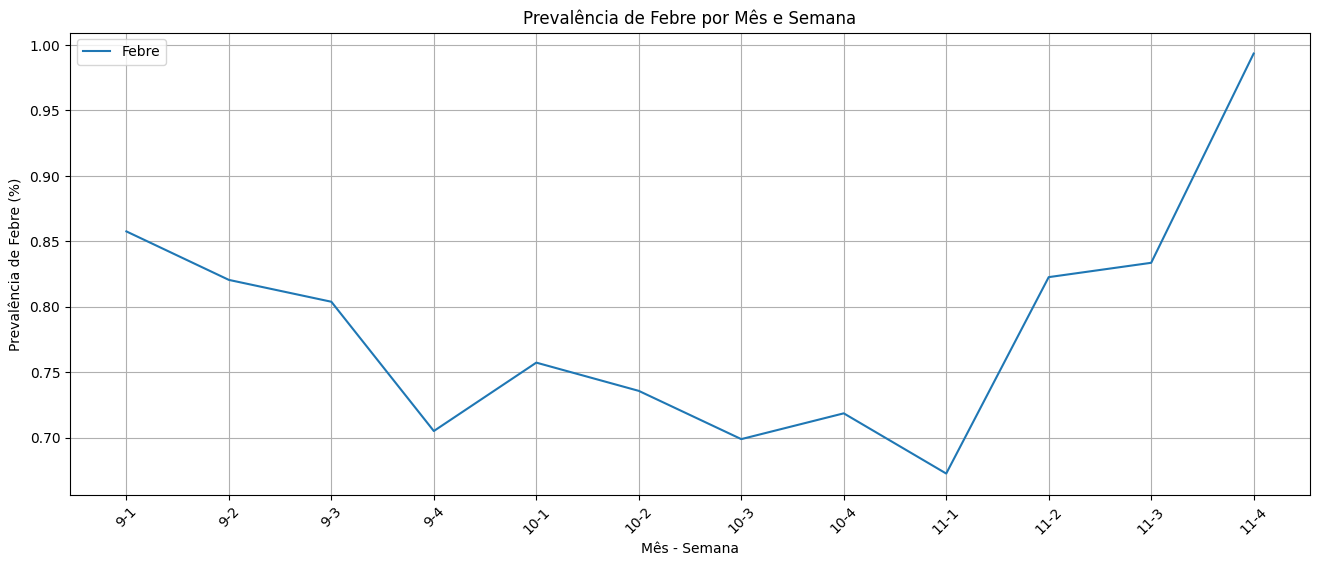

In [162]:
# Resetar o index para facilitar o plot
prevalencia_plot_data = prevalencia_febre_mes_semana.reset_index()

# Create labels for the x-axis
prevalencia_plot_data['label'] = prevalencia_plot_data['mes'].astype(str) + '-' + prevalencia_plot_data['semana'].astype(str)

# Plot the data
plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(prevalencia_plot_data['label'], prevalencia_plot_data[0], label='Febre')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Prevalência de Febre (%)")
plt.title("Prevalência de Febre por Mês e Semana")
plt.xticks(rotation=45)
plt.show()

### 2. Tosse

In [163]:
# Calcular o número de pessoas com tosse (tosse == 1.0) por semana e mês
prevalencia_tosse_mes_semana = (df_clinico[df_clinico['tosse'] == 1.0].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100

print("Prevalência de tosse por semana em cada mês:")
print(prevalencia_tosse_mes_semana)

Prevalência de tosse por semana em cada mês:
mes  semana
9    1         1.547712
     2         1.494495
     3         1.457255
     4         1.225002
10   1         1.201185
     2         1.235052
     3         1.143314
     4         1.228999
11   1         1.170819
     2         1.341580
     3         1.457065
     4         1.545349
dtype: float64


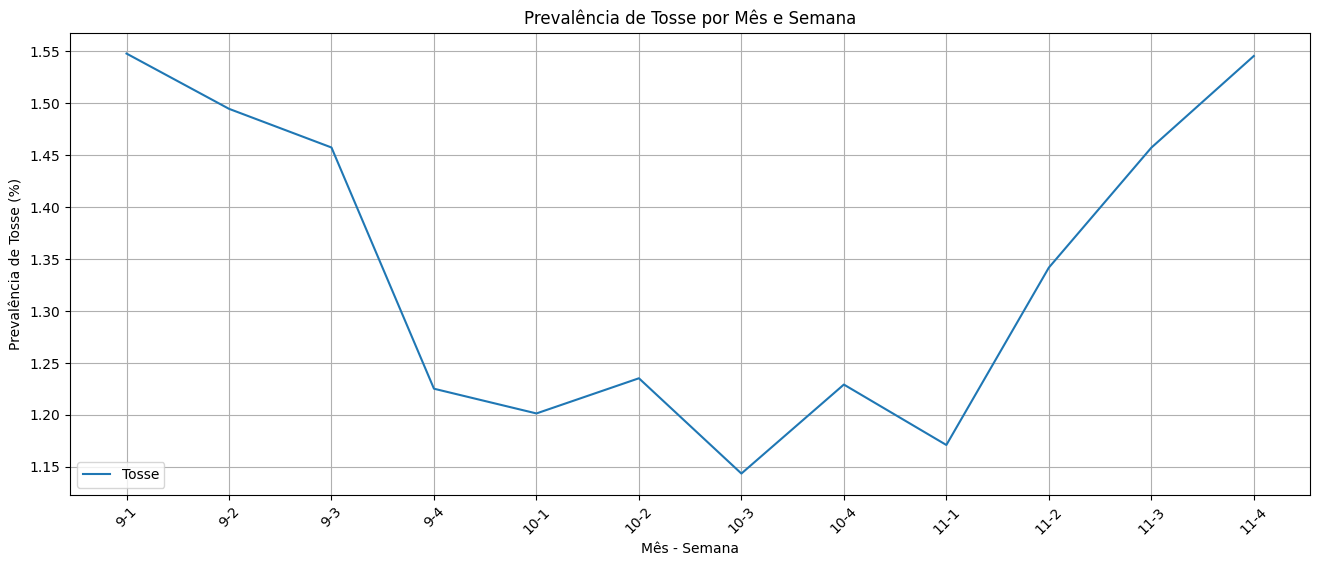

In [164]:
# Resetar o index para facilitar o plot
prevalencia_tosse_plot_data = prevalencia_tosse_mes_semana.reset_index()

# Create labels for the x-axis
prevalencia_tosse_plot_data['label'] = prevalencia_tosse_plot_data['mes'].astype(str) + '-' + prevalencia_tosse_plot_data['semana'].astype(str)

# Plot the data
plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(prevalencia_tosse_plot_data['label'], prevalencia_tosse_plot_data[0], label='Tosse')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Prevalência de Tosse (%)")
plt.title("Prevalência de Tosse por Mês e Semana")
plt.xticks(rotation=45)
plt.show()

### 3. Dor de garganta

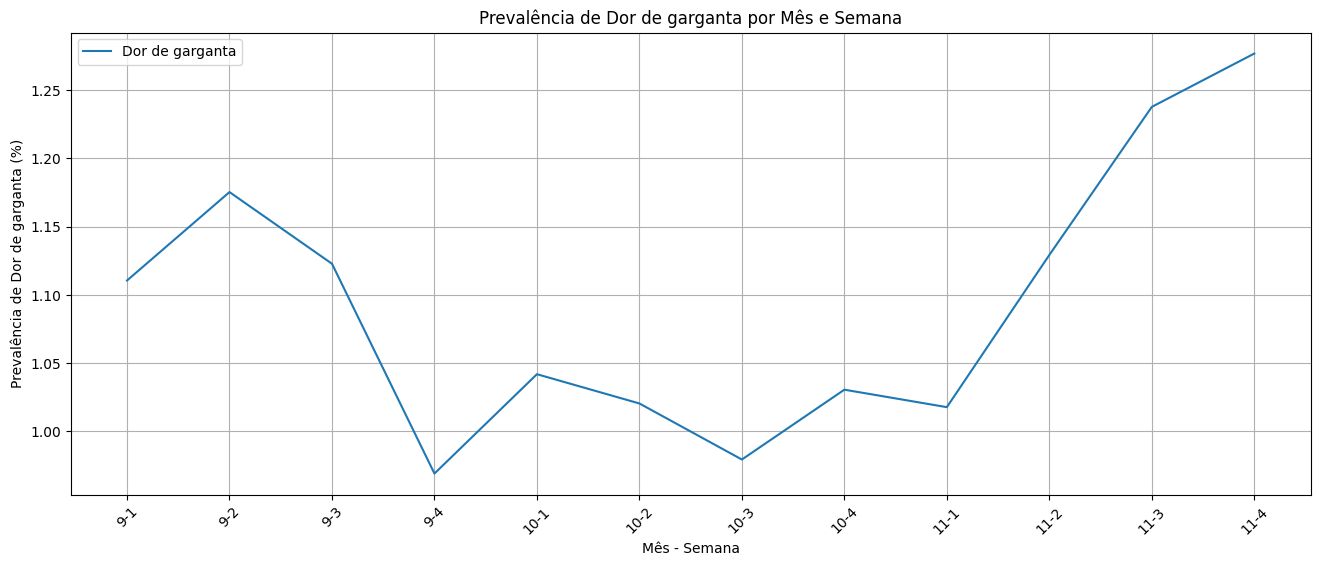

In [165]:
# Calcular o número de pessoas com dor de garganta (dor_garganta == 1.0) por semana e mês
prevalencia_dor_garganta_mes_semana = (df_clinico[df_clinico['dor_garganta'] == 1.0].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100

# Resetar o index para facilitar o plot
prevalencia_dor_garganta_plot_data = prevalencia_dor_garganta_mes_semana.reset_index()

# Create labels for the x-axis
prevalencia_dor_garganta_plot_data['label'] = prevalencia_dor_garganta_plot_data['mes'].astype(str) + '-' + prevalencia_dor_garganta_plot_data['semana'].astype(str)

# Plot the data
plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(prevalencia_dor_garganta_plot_data['label'], prevalencia_dor_garganta_plot_data[0], label='Dor de garganta')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Prevalência de Dor de garganta (%)")
plt.title("Prevalência de Dor de garganta por Mês e Semana")
plt.xticks(rotation=45)
plt.show()

### 4. Dificuldade para respirar

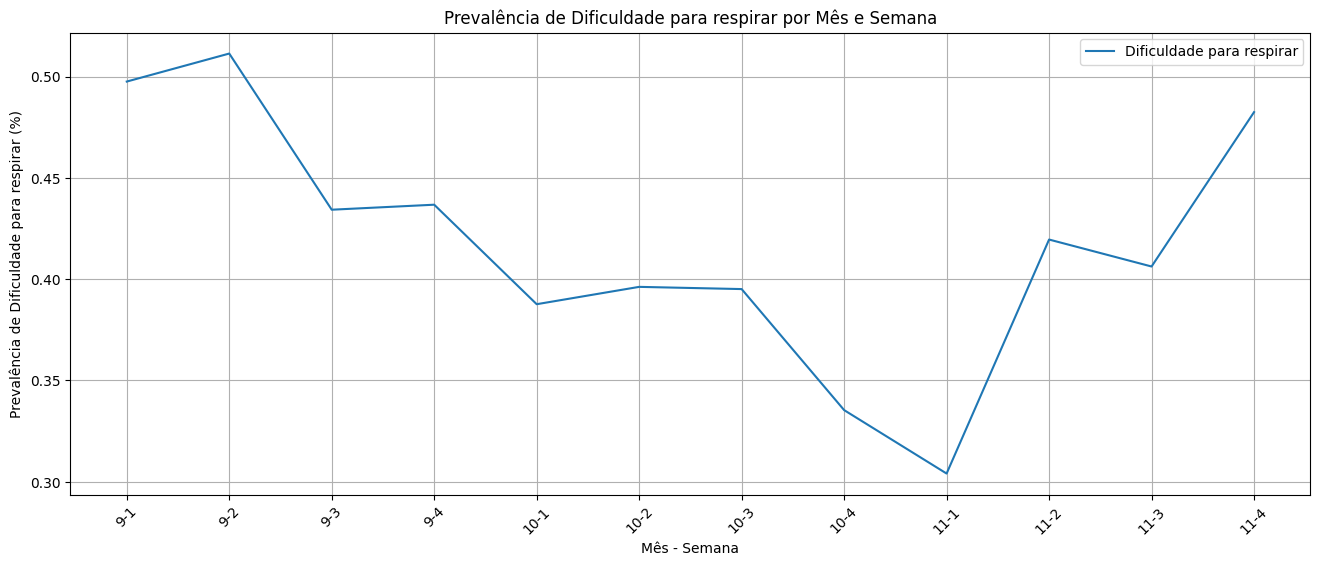

In [166]:
# Calcular o número de pessoas com dificultade para respirar (dificuldade_respirar == 1.0) por semana e mês
prevalencia_dificuldade_respirar_mes_semana = (df_clinico[df_clinico['dificuldade_respirar'] == 1.0].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100

# Resetar o index para facilitar o plot
prevalencia_dificuldade_respirar_plot_data = prevalencia_dificuldade_respirar_mes_semana.reset_index()

# Create labels for the x-axis
prevalencia_dificuldade_respirar_plot_data['label'] = prevalencia_dificuldade_respirar_plot_data['mes'].astype(str) + '-' + prevalencia_dificuldade_respirar_plot_data['semana'].astype(str)

# Plot the data
plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(prevalencia_dificuldade_respirar_plot_data['label'], prevalencia_dificuldade_respirar_plot_data[0], label='Dificuldade para respirar')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Prevalência de Dificuldade para respirar (%)")
plt.title("Prevalência de Dificuldade para respirar por Mês e Semana")
plt.xticks(rotation=45)
plt.show()

### 5. Dor no peito

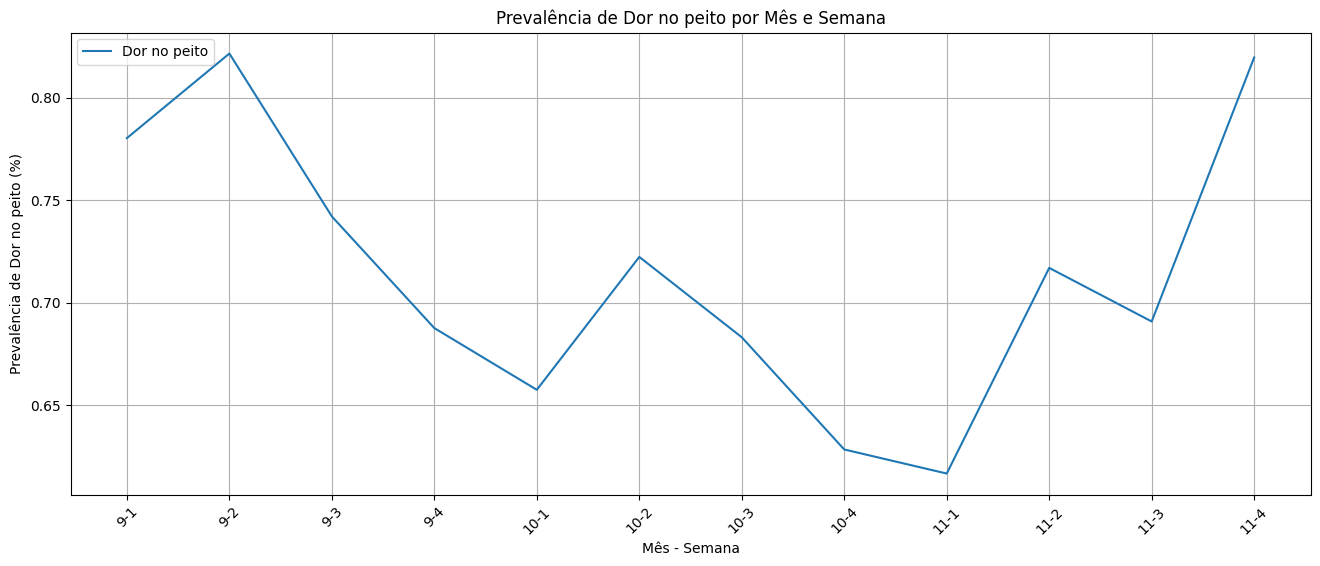

In [167]:
# Calcular o número de pessoas com dor no peito (dor_peito == 1.0) por semana e mês
prevalencia_dor_peito_mes_semana = (df_clinico[df_clinico['dor_peito'] == 1.0].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100

# Resetar o index para facilitar o plot
prevalencia_dor_peito_plot_data = prevalencia_dor_peito_mes_semana.reset_index()

# Create labels for the x-axis
prevalencia_dor_peito_plot_data['label'] = prevalencia_dor_peito_plot_data['mes'].astype(str) + '-' + prevalencia_dor_peito_plot_data['semana'].astype(str)

# Plot the data
plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(prevalencia_dor_peito_plot_data['label'], prevalencia_dor_peito_plot_data[0], label='Dor no peito')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Prevalência de Dor no peito (%)")
plt.title("Prevalência de Dor no peito por Mês e Semana")
plt.xticks(rotation=45)
plt.show()

### 6. Perda de olfato e paladar

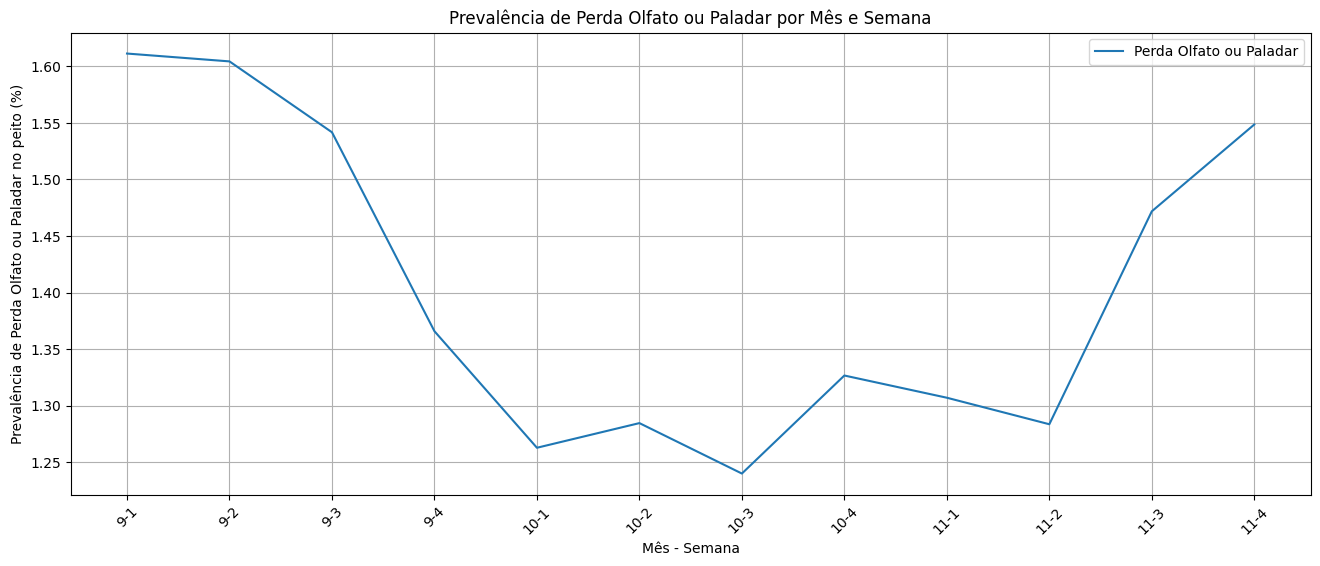

In [168]:
# Calcular o número de pessoas com perda de olfato ou paladar (perda_olfato_paladar == 1.0) por semana e mês
prevalencia_perda_olfato_paladar_mes_semana = (df_clinico[df_clinico['perda_olfato_paladar'] == 1.0].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100

# Resetar o index para facilitar o plot
prevalencia_perda_olfato_paladar_plot_data = prevalencia_perda_olfato_paladar_mes_semana.reset_index()

# Create labels for the x-axis
prevalencia_perda_olfato_paladar_plot_data['label'] = prevalencia_perda_olfato_paladar_plot_data['mes'].astype(str) + '-' + prevalencia_perda_olfato_paladar_plot_data['semana'].astype(str)

# Plot the data
plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(prevalencia_perda_olfato_paladar_plot_data['label'], prevalencia_perda_olfato_paladar_plot_data[0], label='Perda Olfato ou Paladar')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Prevalência de Perda Olfato ou Paladar no peito (%)")
plt.title("Prevalência de Perda Olfato ou Paladar por Mês e Semana")
plt.xticks(rotation=45)
plt.show()

## **Sintomas combinados**

In [169]:
# Análise da combinação de sintomas

# Nota 3: Considera-se que apresentou sintomas conjugados as pessoas que tiveram
# perda de cheiro ou sabor
# ou tosse, febre e dificuldade para respirar
# ou febre, tosse e dor no peito.

# Essa nota foi retirada do documento COVID-19 Data Brazil 2020

In [170]:
# Combinação 1: perda de olfato ou paladar
# Combinação 2: febre, tosse e deficuldade para respirar
# Combinação 3: febre, tosse e dor no peito
# Combinação 4: febre, tosse e perda de olfato ou paladar

combinacao_1 = (df_clinico[(df_clinico['perda_olfato_paladar'] == 1.0)].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100
combinacao_2 = (df_clinico[(df_clinico['febre'] == 1.0) & (df_clinico['tosse'] == 1.0) & (df_clinico['dificuldade_respirar'] == 1.0)].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100
combinacao_3 = (df_clinico[(df_clinico['febre'] == 1.0) & (df_clinico['tosse'] == 1.0) & (df_clinico['dor_peito'] == 1.0)].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100
combinacao_4 = (df_clinico[(df_clinico['febre'] == 1.0) & (df_clinico['tosse'] == 1.0) & (df_clinico['perda_olfato_paladar'] == 1.0)].groupby(['mes', 'semana']).size()/df_clinico.groupby(['mes', 'semana']).size())*100

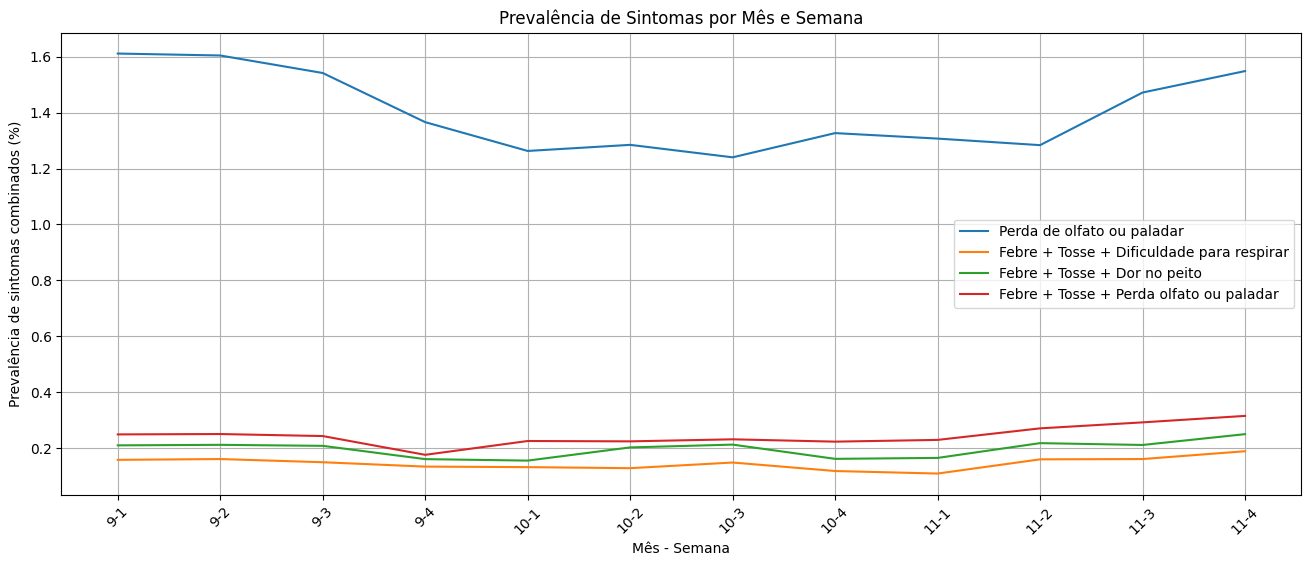

In [171]:
prevalencia_combincacao_1 = combinacao_1.reset_index()
prevalencia_combincacao_1['label'] = prevalencia_combincacao_1['mes'].astype(str) + '-' + prevalencia_combincacao_1['semana'].astype(str)

prevalencia_combinacao_2 = combinacao_2.reset_index()
prevalencia_combinacao_2['label'] = prevalencia_combinacao_2['mes'].astype(str) + '-' + prevalencia_combinacao_2['semana'].astype(str)

prevalencia_combincacao_3 = combinacao_3.reset_index()
prevalencia_combincacao_3['label'] = prevalencia_combincacao_3['mes'].astype(str) + '-' + prevalencia_combincacao_3['semana'].astype(str)

prevalencia_combinacao_4 = combinacao_4.reset_index()
prevalencia_combinacao_4['label'] = prevalencia_combinacao_4['mes'].astype(str) + '-' + prevalencia_combinacao_4['semana'].astype(str)

plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(prevalencia_combincacao_1['label'], prevalencia_combincacao_1[0], label='Perda de olfato ou paladar')
plt.plot(prevalencia_combinacao_2['label'], prevalencia_combinacao_2[0], label='Febre + Tosse + Dificuldade para respirar')
plt.plot(prevalencia_combincacao_3['label'], prevalencia_combincacao_3[0], label='Febre + Tosse + Dor no peito')
plt.plot(prevalencia_combinacao_4['label'], prevalencia_combinacao_4[0], label='Febre + Tosse + Perda olfato ou paladar')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Prevalência de sintomas combinados (%)")
plt.title("Prevalência de Sintomas por Mês e Semana")
plt.xticks(rotation=45)
plt.show()


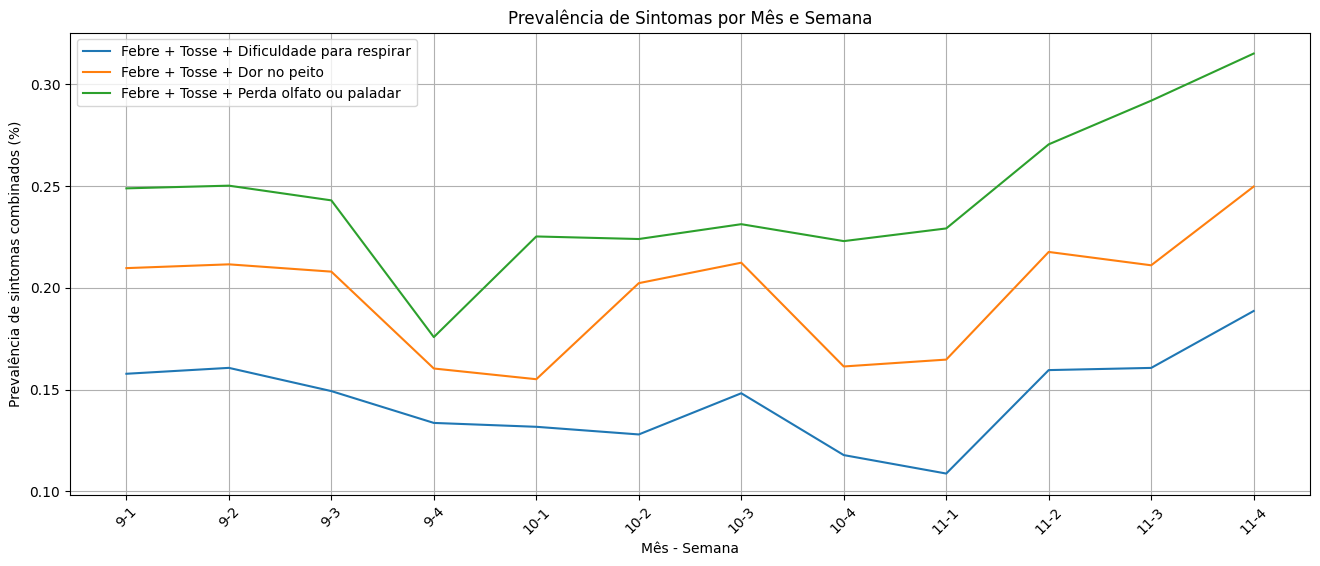

In [172]:
plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(prevalencia_combinacao_2['label'], prevalencia_combinacao_2[0], label='Febre + Tosse + Dificuldade para respirar')
plt.plot(prevalencia_combincacao_3['label'], prevalencia_combincacao_3[0], label='Febre + Tosse + Dor no peito')
plt.plot(prevalencia_combinacao_4['label'], prevalencia_combinacao_4[0], label='Febre + Tosse + Perda olfato ou paladar')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Prevalência de sintomas combinados (%)")
plt.title("Prevalência de Sintomas por Mês e Semana")
plt.xticks(rotation=45)
plt.show()

## **Porcentagem que procurou atendimento entre sintomáticos**

In [173]:
# Pelo menos 1 sintoma apresentado
# Fiz o double check na documetação e o operador OU do python só conta a linha do DF uma vez
# o que elimina a chance de estarmos pegando dados duplicados
sintomaticos = df_clinico[(df_clinico['febre'] == 1.0) | (df_clinico['tosse'] == 1.0)
| (df_clinico['dificuldade_respirar'] == 1.0) | (df_clinico['dor_peito'] == 1.0)
| (df_clinico['perda_olfato_paladar'] == 1.0) | (df_clinico['dor_cabeca'] == 1.0)
| (df_clinico['dor_garganta'] == 1.0)].groupby(['mes','semana']).size()

sintomaticos

mes  semana
9    1         3234
     2         3371
     3         3124
     4         2795
10   1         2615
     2         2667
     3         2525
     4         2591
11   1         2491
     2         2675
     3         2828
     4         3021
dtype: int64

In [174]:
# Quantidade de atendimentos producurados por mes e semana
atendimento = df_clinico[(df_clinico['atendimento'] == 1)].groupby(['mes','semana']).size()
atendimento

mes  semana
9    1         1058
     2         1107
     3          995
     4          947
10   1          934
     2          941
     3          915
     4          870
11   1          813
     2          925
     3         1066
     4         1225
dtype: int64

In [175]:
# sem sintomas e atendimento procurado

sem_sintoma_atendimento = df_clinico[(df_clinico['febre'] != 1.0) & (df_clinico['tosse'] != 1.0)
& (df_clinico['dificuldade_respirar'] != 1.0) & (df_clinico['dor_peito'] != 1.0)
& (df_clinico['perda_olfato_paladar'] != 1.0) & (df_clinico['dor_cabeca'] != 1.0)
& (df_clinico['dor_garganta'] != 1.0) & (df_clinico['atendimento'] == 1)].groupby(['mes','semana']).size()

sem_sintoma_atendimento

mes  semana
9    1         147
     2         167
     3         147
     4         153
10   1         148
     2         125
     3         142
     4         110
11   1         123
     2         118
     3         141
     4         124
dtype: int64

In [176]:
# sintomáticos que procuraram atendimento = Atendimento - sem_sintoma_atendimento
sintomatico_atendimento = atendimento - sem_sintoma_atendimento
sintomatico_atendimento


mes  semana
9    1          911
     2          940
     3          848
     4          794
10   1          786
     2          816
     3          773
     4          760
11   1          690
     2          807
     3          925
     4         1101
dtype: int64

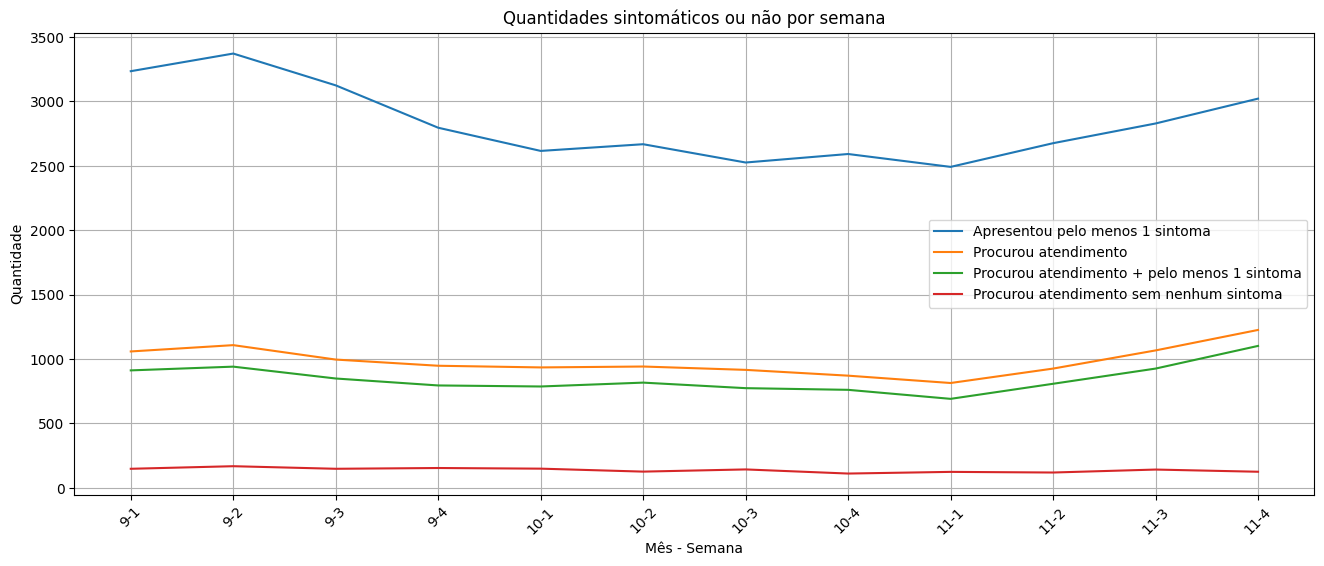

In [177]:
plt.figure(figsize=(16, 6))
plt.grid(True)
sintomatico_atendimento_1 = sintomatico_atendimento.reset_index()
sintomatico_atendimento_1['label'] = sintomatico_atendimento_1['mes'].astype(str) + '-' + sintomatico_atendimento_1['semana'].astype(str)

sintomaticos_1 = sintomaticos.reset_index()
sintomaticos_1['label'] = sintomaticos_1['mes'].astype(str) + '-' + sintomaticos_1['semana'].astype(str)

atendimento_1 = atendimento.reset_index()
atendimento_1['label'] = atendimento_1['mes'].astype(str) + '-' + atendimento_1['semana'].astype(str)

sem_sintoma_atendimento_1 = sem_sintoma_atendimento.reset_index()
sem_sintoma_atendimento_1['label'] = sem_sintoma_atendimento_1['mes'].astype(str) + '-' + sem_sintoma_atendimento_1['semana'].astype(str)



plt.plot(sintomaticos_1['label'], sintomaticos_1[0], label='Apresentou pelo menos 1 sintoma')
plt.plot(atendimento_1['label'], atendimento_1[0], label='Procurou atendimento')
plt.plot(sintomatico_atendimento_1['label'], sintomatico_atendimento_1[0], label = 'Procurou atendimento + pelo menos 1 sintoma')
plt.plot(sem_sintoma_atendimento_1['label'], sem_sintoma_atendimento_1[0], label = 'Procurou atendimento sem nenhum sintoma')

plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Quantidade")
plt.title("Quantidades sintomáticos ou não por semana")
plt.xticks(rotation=45)
plt.show()

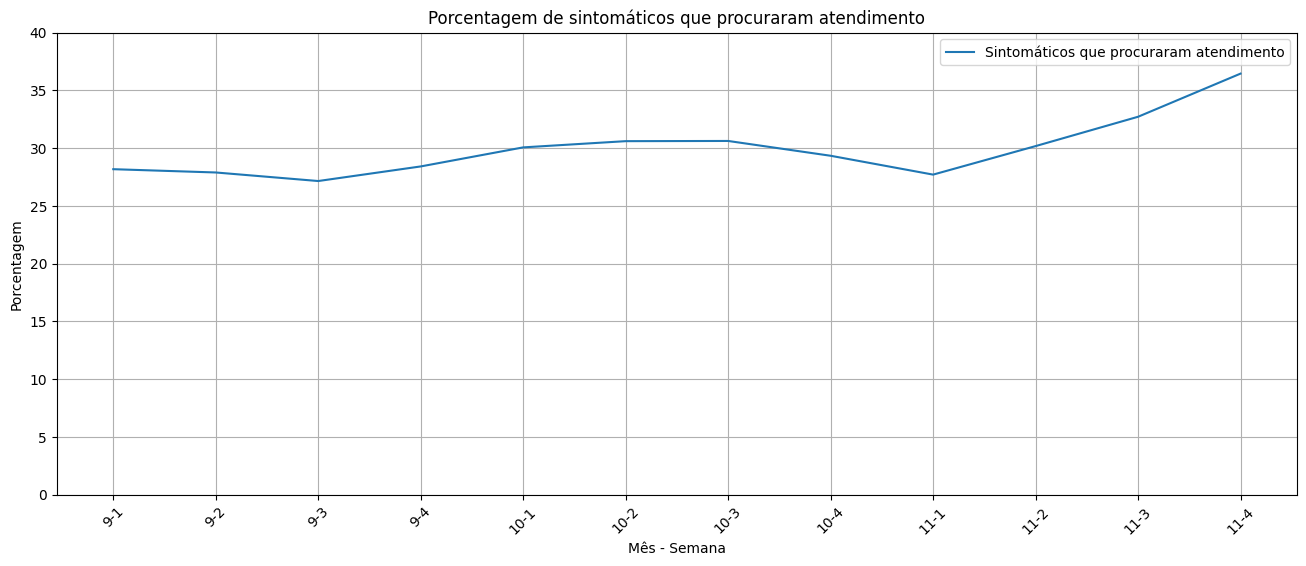

In [178]:
porcentagem_sintomaticos_atendimento = (sintomatico_atendimento/sintomaticos)*100
porcentagem_sintomaticos_atendimento_1 = porcentagem_sintomaticos_atendimento.reset_index()
porcentagem_sintomaticos_atendimento_1['label'] = porcentagem_sintomaticos_atendimento_1['mes'].astype(str) + '-' + porcentagem_sintomaticos_atendimento_1['semana'].astype(str)
plt.figure(figsize=(16, 6))
plt.grid(True)

plt.plot(porcentagem_sintomaticos_atendimento_1['label'], porcentagem_sintomaticos_atendimento_1[0], label = 'Sintomáticos que procuraram atendimento')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Porcentagem")
plt.ylim(0, 40)
plt.title("Porcentagem de sintomáticos que procuraram atendimento")
plt.xticks(rotation=45)
plt.show()

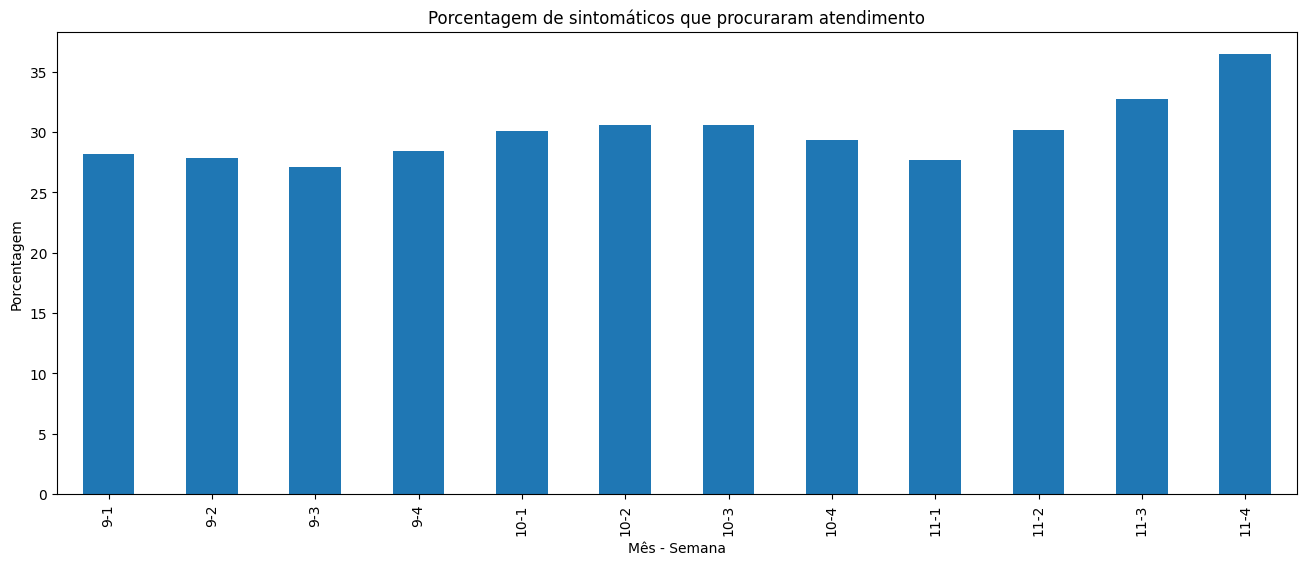

In [179]:
porcentagem_df = porcentagem_sintomaticos_atendimento.reset_index(name='porcentagem')
porcentagem_df['periodo'] = porcentagem_df['mes'].astype(str) + '-' + porcentagem_df['semana'].astype(str)


g = porcentagem_df.plot(
    kind='bar',
    x = 'periodo',
    y = 'porcentagem',
    figsize=(16,6),
    title="Porcentagem de sintomáticos que procuraram atendimento",
    xlabel="Mês - Semana",
    ylabel="Porcentagem",
    legend = False
    )

plt.show()

## **Testagem e positividade dos testados**

In [180]:
# Total
testados = df_clinico[(df_clinico['realizacao_teste_covid'] == 1)].groupby(['mes','semana']).size()
testados_positivados = (df_clinico[(df_clinico['realizacao_teste_covid'] == 1) & (df_clinico['resultado_teste_covid'] == 1)]).groupby(['mes','semana']).size()
porcentagem_positivados = testados_positivados/testados*100

In [181]:
#  Mulheres sexo == 2
testados_mulheres = df_clinico[(df_clinico['realizacao_teste_covid'] == 1) & (df_clinico['sexo'] == 2)].groupby(['mes','semana']).size()
testados_positivados_mulheres = (df_clinico[(df_clinico['realizacao_teste_covid'] == 1) & (df_clinico['resultado_teste_covid'] == 1) & (df_clinico['sexo'] == 2)]).groupby(['mes','semana']).size()
porcentagem_mulheres = testados_positivados_mulheres/testados_mulheres*100
porcentagem_positivados_mulheres = testados_positivados_mulheres/testados_mulheres*100


# # Homens sexo == 1
testados_homens = df_clinico[(df_clinico['realizacao_teste_covid'] == 1) & (df_clinico['sexo'] == 1)].groupby(['mes','semana']).size()
testados_positivados_homens = (df_clinico[(df_clinico['realizacao_teste_covid'] == 1) & (df_clinico['resultado_teste_covid'] == 1) & (df_clinico['sexo'] == 1)]).groupby(['mes','semana']).size()
porcentagem_homens = testados_positivados_homens/testados_homens*100
porcentagem_positivados_homens = testados_positivados_homens/testados_homens*100

In [182]:
testados

mes  semana
9    1          8870
     2          9938
     3         10265
     4         10059
10   1         10538
     2         11319
     3         11579
     4         11104
11   1         11829
     2         12474
     3         12923
     4         12644
dtype: int64

In [183]:
testados_positivados

mes  semana
9    1         317
     2         388
     3         425
     4         435
10   1         607
     2         660
     3         675
     4         637
11   1         687
     2         824
     3         705
     4         574
dtype: int64

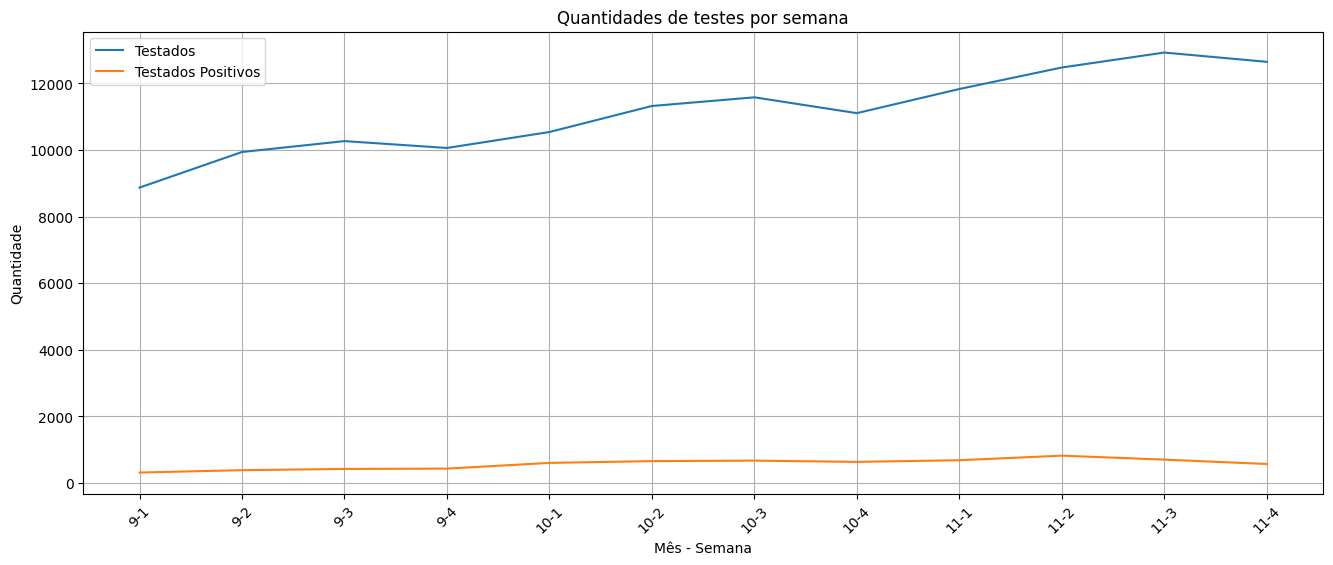

In [184]:
plt.figure(figsize=(16, 6))
plt.grid(True)
testados_1 = testados.reset_index()
testados_1['label'] = testados_1['mes'].astype(str) + '-' + testados_1['semana'].astype(str)
testados_mulheres_1 = testados_mulheres.reset_index()
testados_mulheres_1['label'] = testados_mulheres_1['mes'].astype(str) + '-' + testados_mulheres_1['semana'].astype(str)
testados_homens_1 = testados_homens.reset_index()
testados_homens_1['label'] = testados_homens_1['mes'].astype(str) + '-' + testados_homens_1['semana'].astype(str)

testados_positivados_1 = testados_positivados.reset_index()
testados_positivados_1['label'] = testados_positivados_1['mes'].astype(str) + '-' + testados_positivados_1['semana'].astype(str)
testados_positivados_mulheres_1 = testados_positivados_mulheres.reset_index()
testados_positivados_mulheres_1['label'] = testados_positivados_mulheres_1['mes'].astype(str) + '-' + testados_positivados_mulheres_1['semana'].astype(str)
testados_positivados_homens_1 = testados_positivados_homens.reset_index()
testados_positivados_homens_1['label'] = testados_positivados_homens_1['mes'].astype(str) + '-' + testados_positivados_homens_1['semana'].astype(str)



plt.plot(testados_1['label'], testados_1[0], label='Testados')
plt.plot(testados_positivados_1['label'], testados_positivados_1[0], label='Testados Positivos')

plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Quantidade")
plt.title("Quantidades de testes por semana")
plt.xticks(rotation=45)
plt.show()


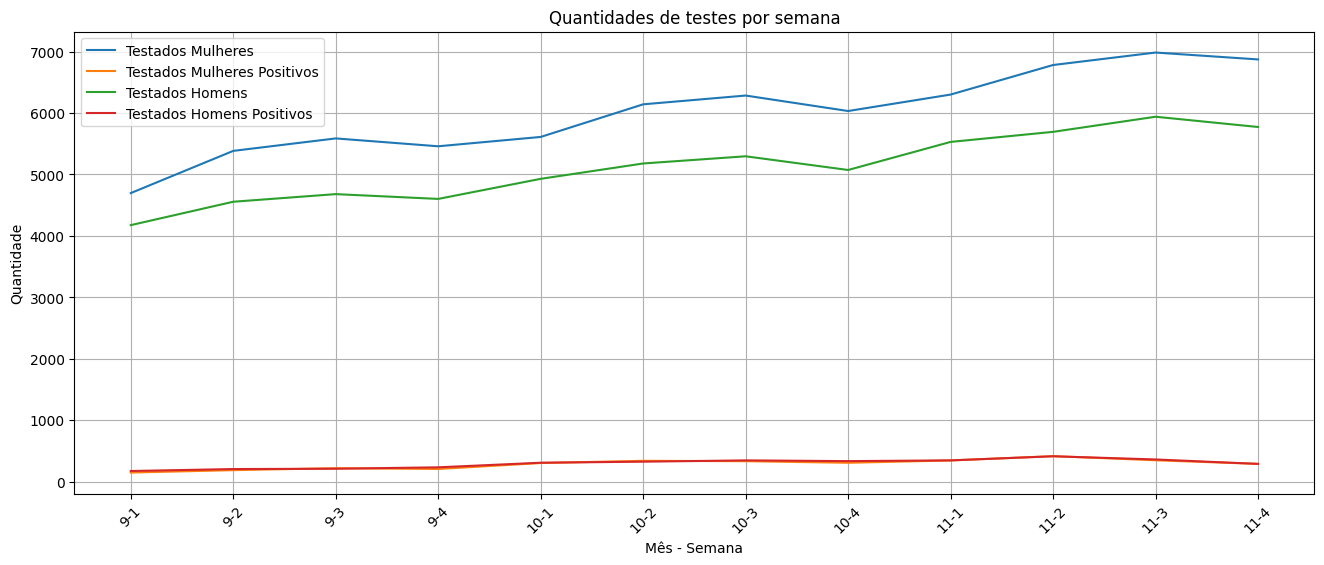

In [185]:
plt.figure(figsize=(16, 6))
plt.grid(True)

testados_mulheres_1 = testados_mulheres.reset_index()
testados_mulheres_1['label'] = testados_mulheres_1['mes'].astype(str) + '-' + testados_mulheres_1['semana'].astype(str)
testados_homens_1 = testados_homens.reset_index()
testados_homens_1['label'] = testados_homens_1['mes'].astype(str) + '-' + testados_homens_1['semana'].astype(str)

testados_positivados_mulheres_1 = testados_positivados_mulheres.reset_index()
testados_positivados_mulheres_1['label'] = testados_positivados_mulheres_1['mes'].astype(str) + '-' + testados_positivados_mulheres_1['semana'].astype(str)
testados_positivados_homens_1 = testados_positivados_homens.reset_index()
testados_positivados_homens_1['label'] = testados_positivados_homens_1['mes'].astype(str) + '-' + testados_positivados_homens_1['semana'].astype(str)


plt.plot(testados_mulheres_1['label'], testados_mulheres_1[0], label='Testados Mulheres')
plt.plot(testados_positivados_mulheres_1['label'], testados_positivados_mulheres_1[0], label='Testados Mulheres Positivos')
plt.plot(testados_homens_1['label'], testados_homens_1[0], label='Testados Homens')
plt.plot(testados_positivados_homens_1['label'], testados_positivados_homens_1[0], label='Testados Homens Positivos')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Quantidade")
plt.title("Quantidades de testes por semana")
plt.xticks(rotation=45)
plt.show()

## **Recorte de sexo para porcetagem de positivos com período de alerta**

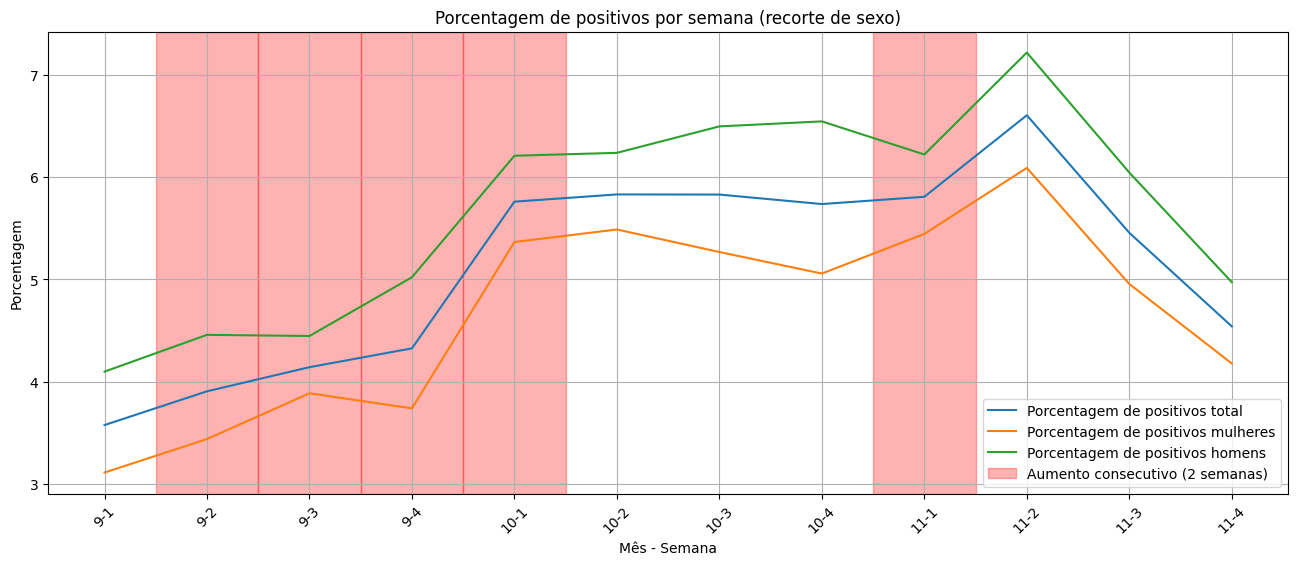

In [186]:
plt.figure(figsize=(16, 6))
plt.grid(True)
porcentagem_1 = porcentagem_positivados.reset_index()
porcentagem_1['label'] = porcentagem_1['mes'].astype(str) + '-' + porcentagem_1['semana'].astype(str)
porcentagem_mulheres_1 = porcentagem_mulheres.reset_index()
porcentagem_mulheres_1['label'] = porcentagem_mulheres_1['mes'].astype(str) + '-' + porcentagem_mulheres_1['semana'].astype(str)
porcentagem_positivados_homens_1 = porcentagem_positivados_homens.reset_index()
porcentagem_positivados_homens_1['label'] = porcentagem_positivados_homens_1['mes'].astype(str) + '-' + porcentagem_positivados_homens_1['semana'].astype(str)

plt.plot(porcentagem_1['label'], porcentagem_1[0], label='Porcentagem de positivos total')
plt.plot(porcentagem_mulheres_1['label'], porcentagem_mulheres_1[0], label='Porcentagem de positivos mulheres')
plt.plot(porcentagem_positivados_homens_1['label'], porcentagem_positivados_homens_1[0], label='Porcentagem de positivos homens')

# Aumentos consecutivos
crescimento_consecutivo = (porcentagem_1[0].diff() > 0) & (porcentagem_1[0].diff().shift(-1) > 0)

# Destaque nos aumentos consecutivos
for i, (label, increase) in enumerate(zip(porcentagem_1['label'], crescimento_consecutivo)):
    if increase:
        plt.axvspan(i - 0.5, i + 0.5, color='red', alpha=0.3, label='Aumento consecutivo (2 semanas)' if i == porcentagem_1.index[crescimento_consecutivo][0] else "")

plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Porcentagem")
plt.title("Porcentagem de positivos por semana (recorte de sexo)")
plt.xticks(rotation=45)
plt.show()

### **Assintomáticos que procuraram atendimento e testaram positivo.**

In [187]:
# A partir daqui adicionei as últimas perguntas que fizemos no sábado dia 27/09/2025
# positivados sem sintoma

In [188]:
# Todos que não tiveram nenhum sintoma, procuraram atendimento, e testaram positivo
positivados_sem_sintoma = df_clinico[(df_clinico['febre'] != 1.0) & (df_clinico['tosse'] != 1.0)
& (df_clinico['dificuldade_respirar'] != 1.0) & (df_clinico['dor_peito'] != 1.0)
& (df_clinico['perda_olfato_paladar'] != 1.0) & (df_clinico['dor_cabeca'] != 1.0)
& (df_clinico['dor_garganta'] != 1.0) & (df_clinico['atendimento'] == 1) & (df_clinico['resultado_teste_covid'] == 1)].groupby(['mes','semana']).size()

positivados_sem_sintoma

mes  semana
9    1         1
     2         7
     3         3
     4         5
10   1         2
     2         9
     3         2
     4         7
11   1         3
     2         4
     3         3
     4         5
dtype: int64

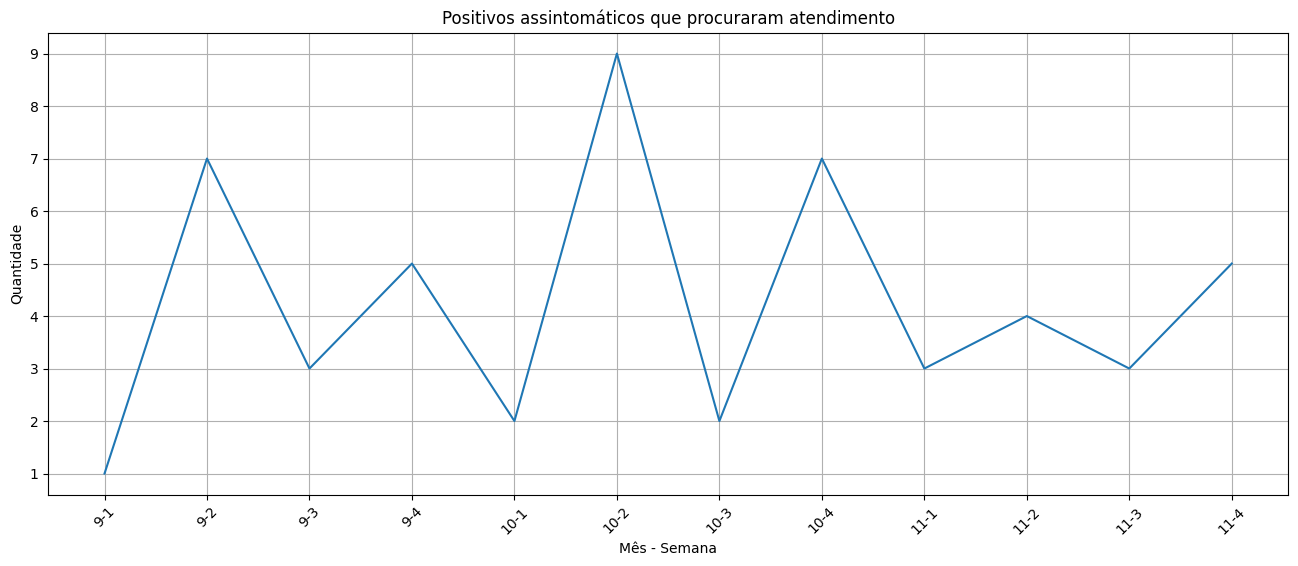

In [189]:
positivados_sem_sintoma_1 = positivados_sem_sintoma.reset_index()
plt.figure(figsize=(16,6))
plt.grid()
positivados_sem_sintoma_1['label'] = positivados_sem_sintoma_1['mes'].astype(str) + '-' + positivados_sem_sintoma_1['semana'].astype(str)
plt.plot(positivados_sem_sintoma_1['label'], positivados_sem_sintoma_1[0], label='Positivados sem sintoma')
plt.title('Positivos assintomáticos que procuraram atendimento')
plt.xlabel('Mês - Semana')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()



### **Recorte de sexo para a procura aos atendimentos**

In [190]:
# Número de mulheres | mulheres que procuraram atendimento | %
mulheres = df_clinico[(df_clinico['sexo'] == 2)].groupby(['mes','semana']).size()
mulheres_atendimento = (df_clinico[(df_clinico['sexo'] == 2) & (df_clinico['atendimento'] == 1)]).groupby(['mes','semana']).size()
porcentagem_mulheres_atendimento = (mulheres_atendimento/mulheres)*100


# Número de homens | homens que procuraram atendimento | %
homens = df_clinico[(df_clinico['sexo'] == 1)].groupby(['mes','semana']).size()
homens_atendimento = (df_clinico[(df_clinico['sexo'] == 1) & (df_clinico['atendimento'] == 1)]).groupby(['mes','semana']).size()
porcentagem_homens_atendimento = (homens_atendimento/homens)*100



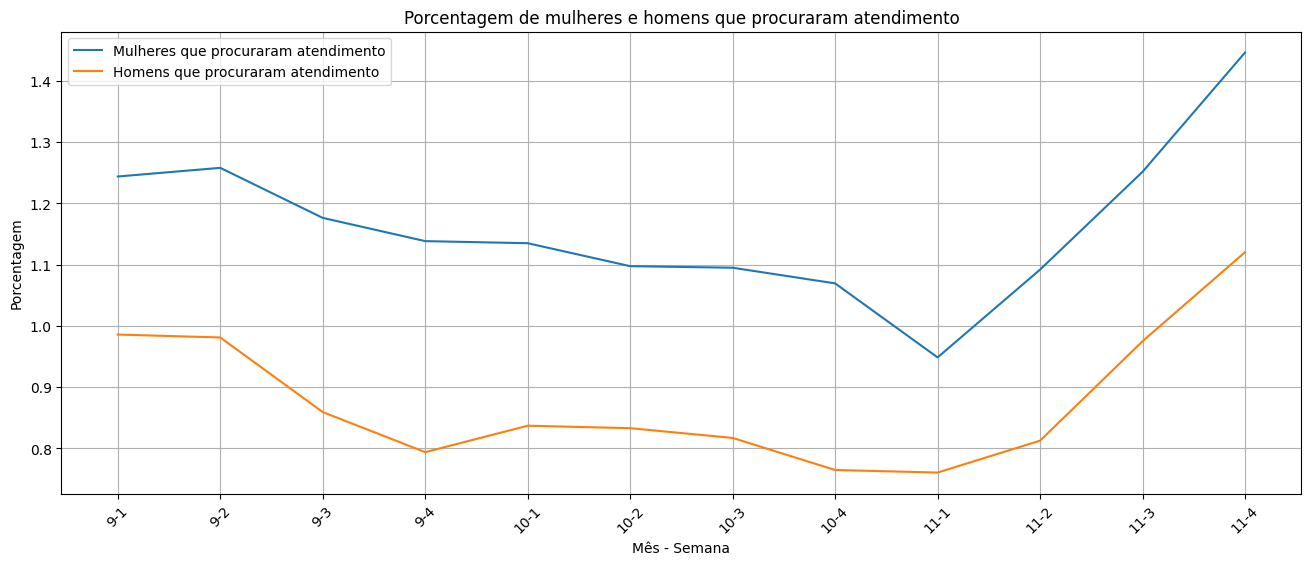

In [191]:
plt.figure(figsize=(16, 6))
plt.grid(True)
porcentagem_mulheres_atendimento_1 = porcentagem_mulheres_atendimento.reset_index()
porcentagem_mulheres_atendimento_1['label'] = porcentagem_mulheres_atendimento_1['mes'].astype(str) + '-' + porcentagem_mulheres_atendimento_1['semana'].astype(str)
porcentagem_homens_atendimento_1 = porcentagem_homens_atendimento.reset_index()
porcentagem_homens_atendimento_1['label'] = porcentagem_homens_atendimento_1['mes'].astype(str) + '-' + porcentagem_homens_atendimento_1['semana'].astype(str)
plt.plot(porcentagem_mulheres_atendimento_1['label'], porcentagem_mulheres_atendimento_1[0], label='Mulheres que procuraram atendimento')
plt.plot(porcentagem_homens_atendimento_1['label'], porcentagem_homens_atendimento_1[0], label='Homens que procuraram atendimento')
plt.legend()
plt.xlabel("Mês - Semana")
plt.ylabel("Porcentagem")
plt.title("Porcentagem de mulheres e homens que procuraram atendimento")
plt.xticks(rotation=45)
plt.show()

# Análise Socioeconomico

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [193]:
df3 = df.rename(columns={
    "V1022": "situacao_dom",
    "V1023": "area",
    "A001A": "condicao_domicilio",
    "A002": "idade",
    "A003": "sexo",
    "A004": "cor_ou_raca",
    "A005": "escolaridade",
    "C002": "afastamento_trabalho",
    "C003": "motivo_afastamento",
    "C004": "continuou_remunerado",
    "C005": "tempo_afastamento",
    "C006": "mais_de_um_trabalho",
    "C007": "tipo_trabalho",
    "C007A": "area_trabalho",
    "C007B": "modalidade_trabalho",
    "C007C": "funcao",
    "C007D": "atividade_empresa",
    "C007F": "suspensao_trabalho",
    "C008": "horas_trabalhadas",
    "C01011": "faixa_salarial",
    "C0104": "nao_remunerado",
    "C012": "local_de_trabalho",
    "C013": "teletrabalho",
    "C014": "inss",
    "C015": "procura_trabalho",
    "C016": "motivo_nao_procura",
    "D0011": "rendimento_aposentadoria",
    "D0013": "valor_recebido_aposentadoria",
    "D0021": "pensao_alimenticia",
    "D0023": "valor_pensao",
    "D0031": "bolsa_familia",
    "D0033": "valor_recebido_pbf",
    "D0041": "recebimento_bpc_loas",
    "D0043": "valor_recebido_bpc_loas",
    "D0051": "recebeu_auxilio_emergencial",
    "D0053": "valor_auxilio_emergencial",
    "D0061": "seguro_desemprego",
    "D0063": "valor_seguro_desemprego",
    "D0071": "outros_rendimentos",
    "D0073": "valor_outros_rendimentos",
    "E001": "solicitou_emprestimo",
    "E0021": "emprestimo_banco",
    "E0022": "emprestimo_familiar",
    "E0023": "emprestimo_empregador",
    "E0024": "emprestimo_outras_pessoas",
    "F001": "domicilio",
    "F0021": "valor_do_aluguel",
    "F0022": "faixa_valor_aluguel",
    "F002A1": "itens_basicos_sabao",
    "F002A2": "itens_basicos_alcool",
    "F002A3": "itens_basicos_mascaras",
    "F002A4": "itens_basicos_luvas",
    "F002A5": "itens_basicos_agua_sanitaria"
})

In [194]:
df_socioeconomico = df3[['situacao_dom','area', 'idade','sexo', 'cor_ou_raca', 'escolaridade', 'afastamento_trabalho','motivo_afastamento','continuou_remunerado','tempo_afastamento','mais_de_um_trabalho','tipo_trabalho','area_trabalho','modalidade_trabalho','funcao','atividade_empresa', 'faixa_salarial','nao_remunerado','local_de_trabalho','teletrabalho','inss','procura_trabalho','motivo_nao_procura', 'rendimento_aposentadoria', 'valor_recebido_aposentadoria', 'valor_recebido_aposentadoria', 'bolsa_familia', 'valor_recebido_pbf','recebimento_bpc_loas','valor_recebido_bpc_loas', 'recebeu_auxilio_emergencial','valor_auxilio_emergencial','seguro_desemprego','valor_seguro_desemprego', 'outros_rendimentos','valor_outros_rendimentos','solicitou_emprestimo','emprestimo_banco', 'emprestimo_familiar','emprestimo_empregador','emprestimo_outras_pessoas','domicilio','valor_do_aluguel','faixa_valor_aluguel']]

df_socioeconomico.head()

,situacao_dom,area,idade,sexo,cor_ou_raca,escolaridade,afastamento_trabalho,motivo_afastamento,continuou_remunerado,tempo_afastamento,...,outros_rendimentos,valor_outros_rendimentos,solicitou_emprestimo,emprestimo_banco,emprestimo_familiar,emprestimo_empregador,emprestimo_outras_pessoas,domicilio,valor_do_aluguel,faixa_valor_aluguel
0,1,1,36,1,4,5,NaN,NaN,NaN,NaN,...,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN
1,1,1,30,2,4,7,NaN,NaN,NaN,NaN,...,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN
2,1,1,13,1,4,2,NaN,NaN,NaN,NaN,...,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN
3,1,1,11,1,4,2,NaN,NaN,NaN,NaN,...,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN
4,1,1,57,2,1,2,2.0,NaN,NaN,NaN,...,2,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN


In [195]:
df_socioeconomico['cor_ou_raca'] = df_socioeconomico['cor_ou_raca'].map({
    1: 'branca',
    2: 'preta',
    3: 'amarela',
    4: 'parda',
    5: 'indígena'
}).fillna('ignorado')

#df_socioeconomico['cor_ou_raca'].value_counts()


/tmp/ipython-input-957294754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socioeconomico['cor_ou_raca'] = df_socioeconomico['cor_ou_raca'].map({


In [196]:
df_socioeconomico['sexo'] = df_socioeconomico['sexo'].map({
    1: 'homem',
    2: 'mulher'
})
#df_socioeconomico['sexo'].value_counts()

/tmp/ipython-input-2177750298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socioeconomico['sexo'] = df_socioeconomico['sexo'].map({


In [197]:
df_socioeconomico['escolaridade'] = df_socioeconomico['escolaridade'].map({
    1: 'Sem instrução',
    2: 'Fundamental incompleto',
    3 : 'Fundamental completo',
    4 : 'Médio incompleto',
    5 : 'Médio completo',
    6 : 'Superior incompleto',
    7 : 'Superior completo',
    8 : 'Pós-graduação, mestrado ou doutorado'
})
#df_socioeconomico['escolaridade'].value_counts()

/tmp/ipython-input-3735459969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socioeconomico['escolaridade'] = df_socioeconomico['escolaridade'].map({


/tmp/ipython-input-832087593.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  .drop(index="Total", errors="ignore")


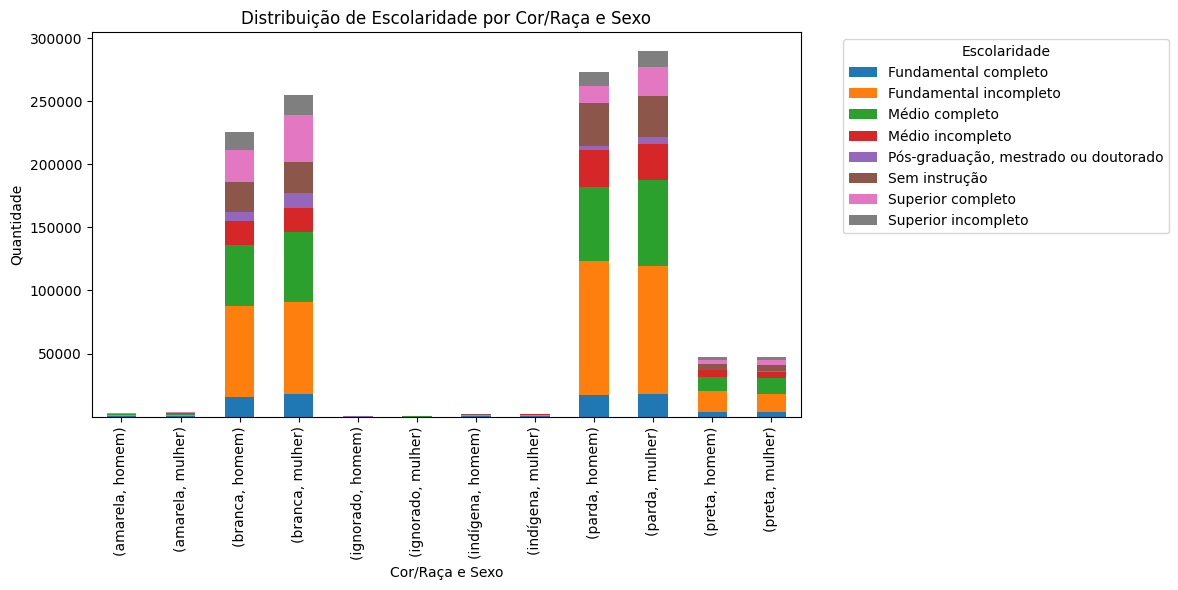

In [198]:
# Tabela cruzada
tbl_esc_raca_genero = pd.crosstab(
    index=[df_socioeconomico['cor_ou_raca'], df_socioeconomico['sexo']],
    columns=df_socioeconomico['escolaridade'],
    margins=True,
    margins_name='Total'
)

# Remover a coluna e a linha de totais
tbl_sem_total = (
    tbl_esc_raca_genero
    .drop(columns="Total", errors="ignore")
    .drop(index="Total", errors="ignore")
)

# Gráfico de barras empilhadas
tbl_sem_total.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title("Distribuição de Escolaridade por Cor/Raça e Sexo")
plt.xlabel("Cor/Raça e Sexo")
plt.ylabel("Quantidade")
plt.legend(title="Escolaridade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Trabalho

In [199]:
df_socioeconomico['afastamento_trabalho'] = df_socioeconomico['afastamento_trabalho'].map({
    1: 'sim',
    2: 'não'
}).fillna('não aplicável')

#df_socioeconomico['afastamento_trabalho'].value_counts()

/tmp/ipython-input-727973223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socioeconomico['afastamento_trabalho'] = df_socioeconomico['afastamento_trabalho'].map({


In [200]:
df_socioeconomico['motivo_afastamento'] = df_socioeconomico['motivo_afastamento'].map({
    1: 'Estava em quarentena, isolamento, distanciamento social ou férias coletivas',
    2: 'Férias, folga ou jornada de trabalho variável ',
    3 : 'Licença maternidade ou paternidade',
    4 : 'Licença remunerada por motivo de saúde ou acidente da própria pessoa',
    5 : 'Outro tipo de licença remunerada (estudo, paternidade, casamento, licença prêmio, etc.) ',
    6 : 'Afastamento do próprio negócio/empresa por motivo de gestação, saúde, acidente, etc., sem ser remunerado por instituto de previdência',
    7 : 'Fatores ocasionais (mau tempo, paralisação nos serviços de transportes, etc.)',
    8 : 'Outro motivo'
}).fillna('não aplicável')
#df_socioeconomico['motivo_afastamento'].value_counts()

/tmp/ipython-input-2535106273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socioeconomico['motivo_afastamento'] = df_socioeconomico['motivo_afastamento'].map({


In [201]:
df_socioeconomico['continuou_remunerado'] = df_socioeconomico['continuou_remunerado'].map({
    1: 'sim',
    2: 'não',
    3 : 'O trabalho já não era remunerado'
}).fillna('não aplicável')
#df_socioeconomico['continuou_remunerado'].value_counts()

/tmp/ipython-input-915329573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socioeconomico['continuou_remunerado'] = df_socioeconomico['continuou_remunerado'].map({


In [202]:
df_socioeconomico['tempo_afastamento'] = df_socioeconomico['tempo_afastamento'].map({
    1 : 'Menos de 1 mês',
    2 : 'De 1 mês a menos de 1 ano',
    3 : 'De 1 ano a menos de 2 anos',
    4 : '2 anos ou mais'
}).fillna('não aplicável')
#df_socioeconomico['tempo_afastamento'].value_counts()

/tmp/ipython-input-1128919335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socioeconomico['tempo_afastamento'] = df_socioeconomico['tempo_afastamento'].map({


In [203]:
df_socioeconomico[['continuou_remunerado','mais_de_um_trabalho']] = (
    df_socioeconomico[['continuou_remunerado','mais_de_um_trabalho']]
    .replace({1: 'sim', 2: 'não'})
    .fillna('não aplicável')
)

#df_socioeconomico['mais_de_um_trabalho'].value_counts()

/tmp/ipython-input-1568278916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socioeconomico[['continuou_remunerado','mais_de_um_trabalho']] = (


IndexError: index 0 is out of bounds for axis 0 with size 0

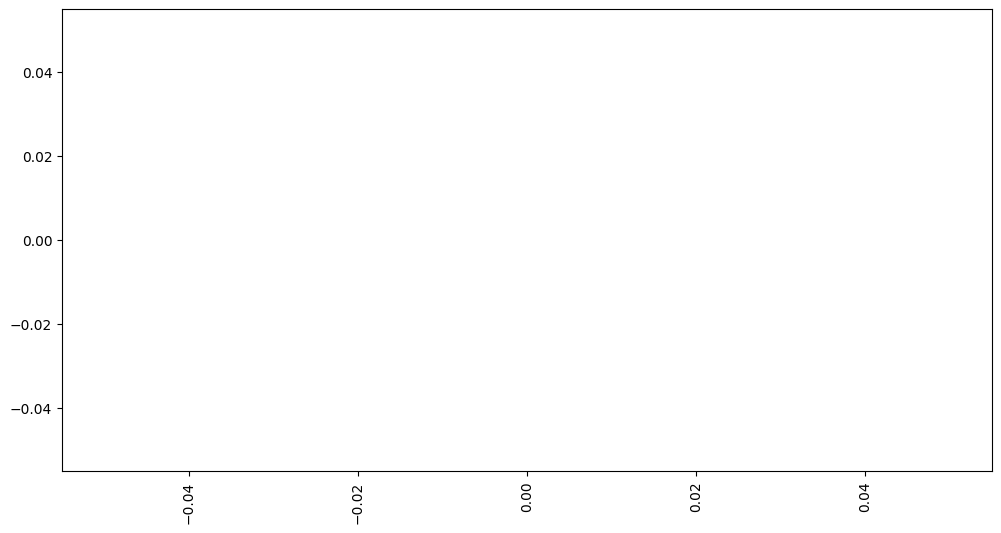

In [204]:
# 1) Filtrar somente quem teve afastamento
df_afast = df_socioeconomico.loc[df_socioeconomico['afastamento_trabalho'] == 1].copy()

# (Opcional) Garantir que as descrições já estejam mapeadas (caso ainda estejam em códigos)
# Ex.: df_afast['cor_ou_raca'] = df_afast['cor_ou_raca'].map({1:'branca',2:'preta',3:'amarela',4:'parda',5:'indígena'}).fillna('ignorado')

# 2) Criar um rótulo de grupo "Cor/Raça | Sexo" para facilitar os gráficos
df_afast['grupo'] = df_afast['cor_ou_raca'].astype(str).str.strip() + ' | ' + df_afast['sexo'].astype(str).str.strip()

# 3) ----- Principais MOTIVOS DE AFASTAMENTO (Top N) -----
TOP_N = 10  # ajuste se quiser mais/menos
motivos_top = (
    df_afast['motivo_afastamento']
    .astype(str).str.strip()
    .value_counts()
    .head(TOP_N)
    .index
    .tolist()
)

# 3.1) Gráfico 1: Top N motivos (geral)
top_counts = (
    df_afast['motivo_afastamento']
    .astype(str).str.strip()
    .value_counts()
    .head(TOP_N)
)

plt.figure(figsize=(12,6))
top_counts.plot(kind='bar')
plt.title(f"Top {TOP_N} motivos de afastamento (geral)")
plt.xlabel("Motivo de afastamento")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

# 3.2) Gráfico 2: Distribuição (%) dos TOP motivos por grupo (Cor/Raça | Sexo), empilhado (100%)
tbl_motivos = pd.crosstab(
    index=df_afast['grupo'],
    columns=df_afast['motivo_afastamento'].astype(str).str.strip()
)

# manter apenas as colunas dos top motivos, na ordem
tbl_motivos = tbl_motivos.reindex(columns=motivos_top, fill_value=0)

# transformar em percentuais por linha (grupo)
tbl_motivos_pct = tbl_motivos.div(tbl_motivos.sum(axis=1), axis=0).replace([np.inf, -np.inf], np.nan).fillna(0) * 100

plt.figure(figsize=(14,7))
tbl_motivos_pct.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title(f"Distribuição (%) dos Top {TOP_N} motivos por Cor/Raça | Sexo")
plt.xlabel("Grupo (Cor/Raça | Sexo)")
plt.ylabel("Percentual (%)")
plt.legend(title="Motivo de afastamento", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4) ----- % QUE CONTINUOU REMUNERADO por grupo -----
# Normalizar possíveis representações (1/2, 'sim'/'não', etc.) para binário 1 (sim) / 0 (não)
def to_bin_sim(x):
    if pd.isna(x):
        return np.nan
    # tratar strings
    if isinstance(x, str):
        t = x.strip().lower()
        if t in ['1', 'sim', 's', 'yes', 'y']:
            return 1
        if t in ['2', 'nao', 'não', 'n', 'no']:
            return 0
        return np.nan
    # tratar números
    if isinstance(x, (int, float, np.integer, np.floating)):
        if x == 1:
            return 1
        if x == 2:
            return 0
        return np.nan
    return np.nan

df_afast['continuou_remunerado_bin'] = df_afast['continuou_remunerado'].apply(to_bin_sim)

remun_por_grupo = (
    df_afast
    .groupby('grupo', dropna=False)['continuou_remunerado_bin']
    .mean() * 100
)

plt.figure(figsize=(12,6))
remun_por_grupo.sort_values(ascending=False).plot(kind='bar')
plt.title("% que continuou remunerado durante o afastamento por Cor/Raça | Sexo")
plt.xlabel("Grupo (Cor/Raça | Sexo)")
plt.ylabel("Percentual (%)")
plt.tight_layout()
plt.show()

# 5) ----- TEMPO DE AFASTAMENTO (média) por grupo -----
# Assumindo que 'tempo_afastamento' é numérico (dias ou semanas). Ajuste o rótulo abaixo se necessário.
tempo_medio = (
    df_afast
    .groupby('grupo', dropna=False)['tempo_afastamento']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
tempo_medio.plot(kind='bar')
plt.title("Tempo médio de afastamento por Cor/Raça | Sexo")
plt.xlabel("Grupo (Cor/Raça | Sexo)")
plt.ylabel("Tempo médio de afastamento")
plt.tight_layout()
plt.show()